In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
s1 = [80, 5]
s2 = [60, 30]
s3 = [45, 45]
s4 = [20, 50]

In [3]:
variants = np.array([s1, s2, s3, s4], 'int8')
probabilities = np.array([0.6, 0.4])

In [4]:
variants

array([[80,  5],
       [60, 30],
       [45, 45],
       [20, 50]], dtype=int8)

In [5]:
excepted_profit = variants[:, 0] * probabilities[0] \
                + variants[:, 1] * probabilities[1]

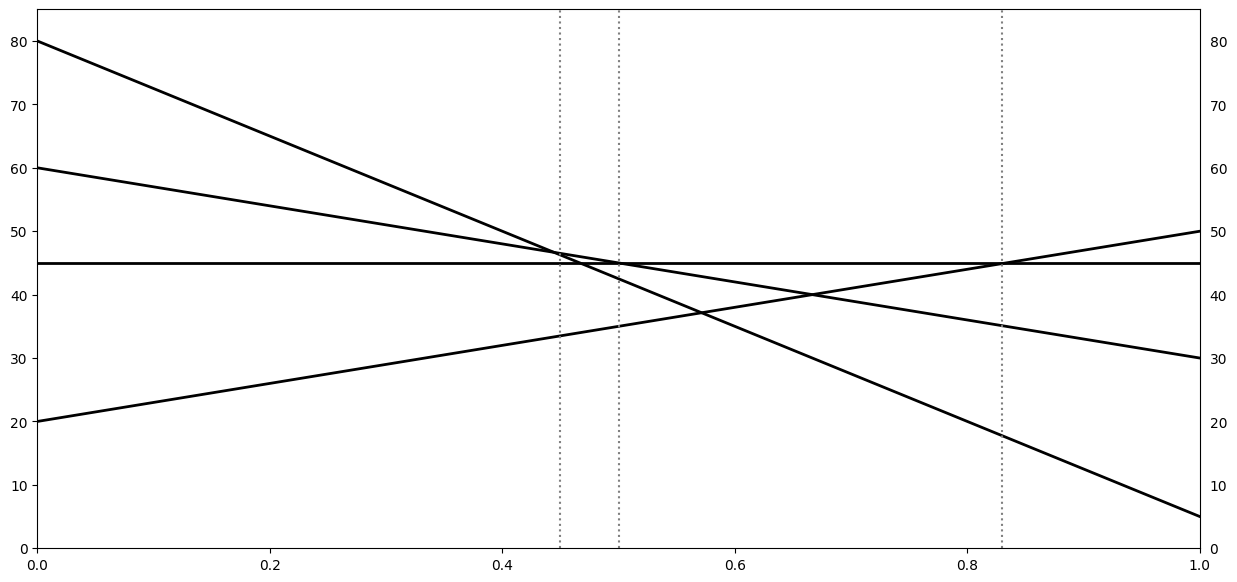

In [82]:
plt.figure(1, figsize=(15, 7), dpi=100)
for variant in variants:
    plt.plot([0, 1], variant, color='black', lw=2)
plt.xlim(0, 1)
plt.ylim(0, np.max(variants) + 5)
plt.vlines(0.45, 0, np.max(variants) + 10, colors='grey', linestyles=':')
plt.vlines(0.5, 0, np.max(variants) + 10, colors='grey', linestyles=':')
plt.vlines(0.83, 0, np.max(variants) + 10, colors='grey', linestyles=':')
plt.tick_params(axis='y', which='both', labelleft=True, labelright=True)
plt.savefig('graph.svg', bbox_inches='tight')
plt.show()

In [7]:
df = pd.DataFrame(
    variants,
    columns=[f'Y{i + 1}' for i in range(len(variants[0, :]))],
    index=[f'S{i + 1}' for i in range(len(variants[:, 0]))]
)

In [8]:
df['Ожидаемая прибыль'] = excepted_profit.astype('int8')

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
df.style.apply(highlight_max, props='color:white;background-color:red', axis=0)
# df.style.applymap(lambda v: 'color: red;' if max(v) else None)

,Y1,Y2,Ожидаемая прибыль
S1,80,5,50
S2,60,30,48
S3,45,45,45
S4,20,50,32


## Критерий Лапласа

In [9]:
laplass = np.sum(variants, axis=1) * 0.5
laplass

array([42.5, 45. , 45. , 35. ])

In [10]:
df2 = pd.DataFrame(
    variants,
    columns=[f'Y{i + 1}' for i in range(len(variants[0, :]))],
    index=[f'S{i + 1}' for i in range(len(variants[:, 0]))]
)
df2['Лапласс'] = laplass
df2

,Y1,Y2,Лапласс
S1,80,5,42.5
S2,60,30,45.0
S3,45,45,45.0
S4,20,50,35.0


## Критерий максимина

In [11]:
df3 = pd.DataFrame(
    variants,
    columns=[f'Y{i + 1}' for i in range(len(variants[0, :]))],
    index=[f'S{i + 1}' for i in range(len(variants[:, 0]))]
)

df3['Min'] = np.min(variants, axis=1)
df3

,Y1,Y2,Min
S1,80,5,5
S2,60,30,30
S3,45,45,45
S4,20,50,20


In [12]:
maximinimum = np.max(df3.Min)
maximinimum

45

## Критерий Сэвидна

In [45]:
regets = np.array([np.abs(variants[:, i] - np.max(variants[:, i])) for i in range(2)]).T
max_regets = np.max(regets, axis=1)

In [50]:
df4 = pd.DataFrame(
    variants,
    columns=[f'Y{i + 1}' for i in range(len(variants[0, :]))],
    index=[f'S{i + 1}' for i in range(len(variants[:, 0]))]
)
df4['Отклонения 1'] = regets[:, 0]
df4['Отклонения 2'] = regets[:, 1]
df4['Наихудший вариант'] = np.min(np.max(regets, axis=1))
df4

,Y1,Y2,Отклонения 1,Отклонения 2,Наихудший вариант
S1,80,5,0,45,20
S2,60,30,20,20,20
S3,45,45,35,5,20
S4,20,50,60,0,20


In [2]:
s1 = [80, 5]
s2 = [60, 30]
s3 = [45, 45]
s4 = [20, 50]

In [3]:
variants = np.array([s1, s2, s3, s4], 'int8')
probabilities = np.array([0.6, 0.4])

In [4]:
variants

array([[80,  5],
       [60, 30],
       [45, 45],
       [20, 50]], dtype=int8)

In [5]:
excepted_profit = variants[:, 0] * probabilities[0] \
                + variants[:, 1] * probabilities[1]

In [6]:
plt.figure(1, figsize=(15, 7), dpi=1_000)
for variant in variants:
    plt.plot([0, 1], variant, color='black', lw=2)
plt.xlim(0, 1)
plt.ylim(0, np.max(variants) + 10)
plt.vlines(probabilities[0], 0, np.max(variants) + 10, colors='grey', linestyles=':')
plt.vlines(probabilities[1], 0, np.max(variants) + 10, colors='grey', linestyles=':')
plt.show()

In [7]:
df = pd.DataFrame(
    variants,
    columns=[f'Y{i + 1}' for i in range(len(variants[0, :]))],
    index=[f'S{i + 1}' for i in range(len(variants[:, 0]))]
)

In [19]:
df['Ожидаемая прибыль'] = excepted_profit.astype('int8')

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
df.style.apply(highlight_max, props='color:white;background-color:red', axis=0)
# df.style.applymap(lambda v: 'color: red;' if max(v) else None)

,Y1,Y2,Ожидаемая прибыль
S1,80,5,50
S2,60,30,48
S3,45,45,45
S4,20,50,32


## Критерий Лапласа

In [24]:
laplass = np.sum(variants, axis=1) * 0.5
laplass

array([42.5, 45. , 45. , 35. ])

In [30]:
df2 = pd.DataFrame(
    variants,
    columns=[f'Y{i + 1}' for i in range(len(variants[0, :]))],
    index=[f'S{i + 1}' for i in range(len(variants[:, 0]))]
)
df2['Лапласс'] = laplass
df2

,Y1,Y2,Лапласс
S1,80,5,42.5
S2,60,30,45.0
S3,45,45,45.0
S4,20,50,35.0


## Критерий максимина

In [34]:
df3 = pd.DataFrame(
    variants,
    columns=[f'Y{i + 1}' for i in range(len(variants[0, :]))],
    index=[f'S{i + 1}' for i in range(len(variants[:, 0]))]
)

df3['Min'] = np.min(variants, axis=1)
df3

,Y1,Y2,Min
S1,80,5,5
S2,60,30,30
S3,45,45,45
S4,20,50,20


In [38]:
maximinimum = np.max(df3.Min)
maximinimum

45

## Критерий Сэвидна